In [2]:
import os
os.chdir('..')

In [20]:
!python detect.py \
    --weights models/bbox-chess3-tiny.pt \
    --conf 0.15 \
    --iou-thres 0.5 \
    --img-size 1280 \
    --source data/datasets/bbox-chess3/images/test/ \
    --save-txt \
    --project runs/detect/chess3 \
    --name bbox-chess3-tiny-test \
    --line-thickness 4 #\
    # --color '0,0,255'

Namespace(weights=['models/bbox-chess3-tiny.pt'], source='data/datasets/bbox-chess3/images/test/', img_size=1280, conf_thres=0.15, iou_thres=0.5, device='', view_img=False, save_txt=True, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect/chess3', name='bbox-chess3-tiny-test', exist_ok=False, no_trace=False, line_thickness=4, color=None)
YOLOR 🚀 v0.1-142-g4ac59ce torch 2.2.0+cu121 CPU

Fusing layers... 
IDetect.fuse
/home/jan/miniconda3/envs/py39/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 208 layers, 6007596 parameters, 0 gradients, 13.0 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

40 movess, Done. (677.7ms) I

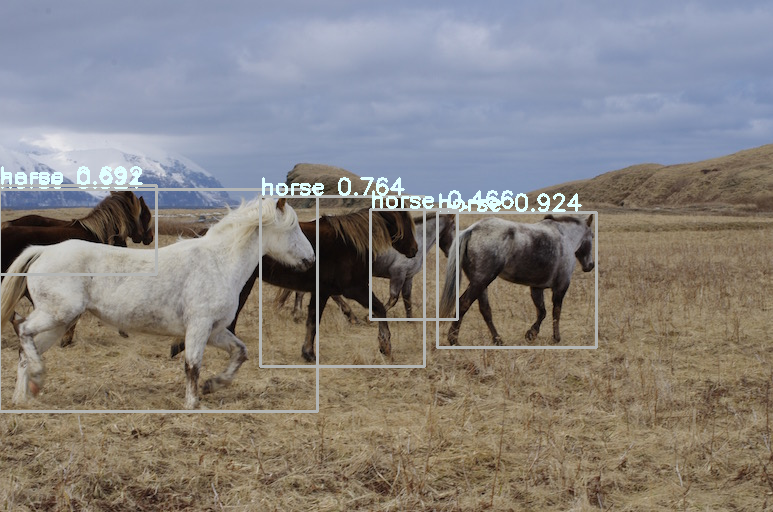

In [ ]:
ori_images = [img.copy()]

for i,(batch_id,x0,y0,x1,y1,cls_id,score) in enumerate(outputs):
    image = ori_images[int(batch_id)]
    box = np.array([x0,y0,x1,y1])
    box -= np.array(dwdh*2)
    box /= ratio
    box = box.round().astype(np.int32).tolist()
    cls_id = int(cls_id)
    score = round(float(score),3)
    name = names[cls_id]
    color = colors[name]
    name += ' '+str(score)
    cv2.rectangle(image,box[:2],box[2:],color,2)
    cv2.putText(image,name,(box[0], box[1] - 2),cv2.FONT_HERSHEY_SIMPLEX,0.75,[225, 255, 255],thickness=2)  

Image.fromarray(ori_images[0])

In [21]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib

def display_images_in_folder(folder_path, ground_truth_path=None, save_images=False):
    # Get a list of all files in the folder
    folder_path = pathlib.Path(folder_path)

    files = os.listdir(folder_path)

    label_path = folder_path / "labels"

    if ground_truth_path is not None:
        ground_truth_path = pathlib.Path(ground_truth_path)
    
    # Filter for image files (assuming common formats like PNG, JPEG, JPG)
    image_files = [file for file in files if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if not image_files:
        print(f"No images found in the folder: {folder_path}")
        return
    
    # Iterate through each image file and display it
    for image_file in image_files:
        # Construct the full path to the image file
        image_path = os.path.join(folder_path, image_file)

        # load label file
        stem = pathlib.Path(image_file).stem
        with open(label_path / (stem + '.txt'), "r") as f:
            labels = f.readlines()
            num_labels = len(labels)
        
        if ground_truth_path is not None:
            with open(ground_truth_path / (stem + '.txt'), "r") as f:
                ground_truth_labels = f.readlines()
                num_ground_truth_labels = len(ground_truth_labels)
        
        # Load and display the image using matplotlib
        img = mpimg.imread(image_path)
        # plt.figure(figsize=(img.shape[0]/200, img.shape[1]/200))
        plt.figure(figsize=(img.shape[0]/100, img.shape[1]/100))
        text = f"predicted Labels: {num_labels}"
        if ground_truth_path is not None:
            text += f"\nground truth labels: {num_ground_truth_labels}"
        plt.text(0, 200, text, color='black', fontsize=24, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6))
        plt.imshow(img)#, interpolation='antialiased')
        plt.title(image_file, fontsize=24)  # Use the filename as the title
        plt.axis('off')  # Hide axis

        if save_images:
            analysis_folder = folder_path / "analysis"
            analysis_folder.mkdir(parents=True, exist_ok=True)
            plt.savefig(analysis_folder / image_file, bbox_inches='tight')
        else:
            plt.show()
        plt.close()


if __name__ == "__main__":
    # Specify the folder path containing the images
    folder_path = "runs/detect/chess3/bbox-chess3-tiny-test17"
    # folder_path = "runs/test/chess3/bbox-chess3-tiny-test4"
    ground_truth_path = "data/datasets/bbox-chess3/labels/test"
    
    # Display images in the specified folder
    display_images_in_folder(folder_path, ground_truth_path, save_images=True)
